## Sales Analysis project

In [19]:
import pandas as pd
import os

In [20]:
os.chdir('E:\\projects_personal\\analysis\\Pandas-Data-Science-Tasks')

In [21]:
files = [file for file in os.listdir('SalesAnalysis/Sales_Data')]
total_data = pd.DataFrame()

In [22]:
for file in files:
#     print(file)
    data = pd.read_csv('./SalesAnalysis/Sales_Data/'+file)
    total_data = pd.concat([total_data, data])
total_data.to_csv('sample.csv', index= False)

In [23]:
total_data = pd.read_csv('sample.csv')
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Best month for sale and the net sale?

In [24]:
nan_df = total_data[total_data.isna().any(axis=1)]
total_data = total_data.dropna(how='all')

In [25]:
total_data = total_data[total_data['Order Date'].str[0:2]!='Or']

In [26]:
# Adding a month column
total_data['Month'] = total_data['Order Date'].str[0:2]
total_data['Month'] = total_data['Month'].astype('int32')

In [27]:
#Add a sales column
total_data['Quantity Ordered'] = pd.to_numeric(total_data['Quantity Ordered'])
total_data['Price Each'] = pd.to_numeric(total_data['Price Each'])
total_data['Sales'] = total_data['Quantity Ordered'] * total_data['Price Each']
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [28]:
sales_analysis = total_data.groupby('Month').sum()
sales_analysis.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


In [30]:
# plotting the sales analysis

import matplotlib.pyplot as plt

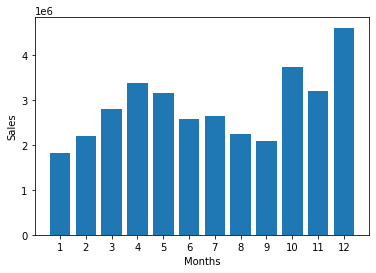

In [31]:
months = range(1,13)
plt.bar(months, sales_analysis['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

## City with the highest sale??

In [32]:
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [33]:
def get_address(address):
    return address.split(',')[2].split(' ')[1]


total_data['City'] = total_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' '+ get_address(x))
total_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [34]:
sales_by_month = total_data.groupby('City').sum()
sales_by_month


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


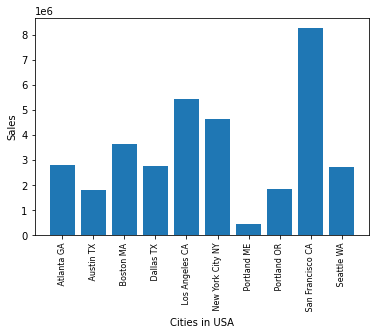

In [35]:
cities = [city for city, df in total_data.groupby('City')]

plt.bar(cities, sales_by_month['Sales'])
plt.xticks(cities, rotation = 'vertical', size=8)
plt.xlabel('Cities in USA')
plt.ylabel('Sales')
plt.show()

#### Best time to display advertisements?

In [37]:
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [38]:
total_data['Order Date'] = pd.to_datetime(total_data['Order Date'])

In [40]:
# total_data.head()
total_data['Hour'] = total_data['Order Date'].dt.hour
total_data['Minute'] = total_data['Order Date'].dt.minute
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [51]:
hours = [hour for hour, df in total_data.groupby('Hour')]
total_data.groupby('Hour').count()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


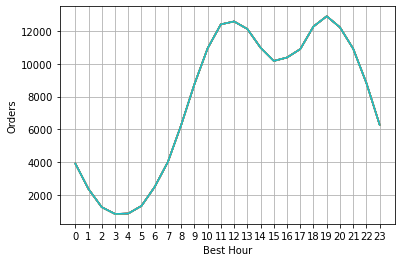

In [55]:
plt.plot(hours, total_data.groupby('Hour').count())

plt.xticks(hours)
plt.xlabel('Best Hour')
plt.ylabel('Orders')
plt.grid()
plt.show()

#### Products most often sold together? 

In [64]:
order_df = total_data[total_data['Order ID'].duplicated(keep=False)]
# order_df.head()
order_df['grouped'] = order_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# order_df.head()
order_df = order_df[['Order ID', 'grouped']].drop_duplicates()
order_df.head()

<ipython-input-64-b9ae91d75e8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df['grouped'] = order_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [66]:
from itertools import combinations
from collections import Counter

count = Counter()
for a in order_df['grouped']:
    a_list = a.split(',')
    count.update(Counter(combinations(a_list, 2)))

count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Most sold Product?

In [67]:
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [69]:
newdf = total_data[['Product', 'Quantity Ordered']]
newdf.head()

,Product,Quantity Ordered
0,USB-C Charging Cable,2
2,Bose SoundSport Headphones,1
3,Google Phone,1
4,Wired Headphones,1
5,Wired Headphones,1


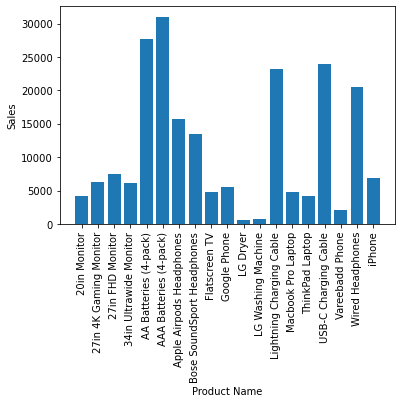

In [76]:
product =  newdf.groupby('Product').sum()
product_name= [pr for pr, df in newdf.groupby('Product')]

plt.bar(product_name, product['Quantity Ordered'])
plt.xticks(product_name, rotation='vertical', size=10)
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()

In [83]:
prices = total_data.groupby('Product').mean()['Price Each']

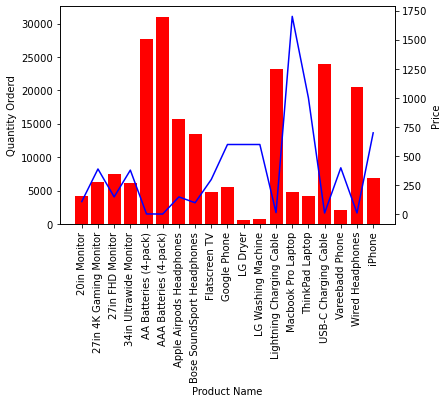

In [88]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_name, product['Quantity Ordered'], color='r')
ax2.plot(product_name, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Orderd')
ax2.set_ylabel('Price')
ax1.set_xticklabels(product_name, rotation='vertical',size=10)
plt.show()
